#### Importando bibliotecas

In [4]:
import pandas as pd
import random
import numpy as np
from faker import Faker
fake = Faker()
from datetime import datetime, timedelta


#### Criando um dataframe com dados fictícios:

In [8]:
regnum = 250
produto = ['Geladeira', 'Air Fryer', 'Celular', 'Notebook', 'Sofá', 'Cama']
categoria = ['Casual', 'Profissional', 'Luxo', 'Edição Limitada']
localidade = ['São Paulo', 'Rio de Janeiro', 'Curitiba', 'Brasília']


dateRange = pd.date_range(start=datetime(2024, 1, 1), end=datetime(2024, 12, 31), freq='D')

lojasData = {
    "ID_Produto" : [random.randint(0,25) for _ in range (len(dateRange))],
    "NomeProduto" : [random.choice(produto) for _ in range (len(dateRange))],
    "Categoria" : [random.choice(categoria) for _ in range (len(dateRange))],
    "Preço" : [round(random.uniform(100, 10000)) for _ in range (len(dateRange))],
    "QuantidadeVendida" : [random.randint(1,100) for _ in range (len(dateRange))],
    "ID_Loja":[random.randint(100,125) for _ in range (len(dateRange))],
    "LocalidadeLoja":[random.choice(localidade) for _ in range (len(dateRange))],
    "DataVenda": dateRange,
}


In [10]:
lojasDf = pd.DataFrame(lojasData)
lojasDf.to_csv('lojasData.csv', index = False)
df = pd.read_csv('lojasData.csv')
df

,ID_Produto,NomeProduto,Categoria,Preço,QuantidadeVendida,ID_Loja,LocalidadeLoja,DataVenda
0,9,Notebook,Profissional,1486,70,125,São Paulo,2024-01-01
1,22,Sofá,Profissional,1063,75,114,Rio de Janeiro,2024-01-02
2,21,Cama,Edição Limitada,1748,33,125,Rio de Janeiro,2024-01-03
3,20,Air Fryer,Luxo,4199,5,100,Rio de Janeiro,2024-01-04
4,11,Geladeira,Profissional,7289,57,104,Curitiba,2024-01-05
...,...,...,...,...,...,...,...,...
361,19,Air Fryer,Edição Limitada,657,90,102,Rio de Janeiro,2024-12-27
362,4,Notebook,Casual,6150,45,107,Brasília,2024-12-28
363,21,Notebook,Luxo,7744,75,121,Brasília,2024-12-29
364,12,Sofá,Profissional,4986,9,118,Brasília,2024-12-30


### Análises

##### Análise exploratória

##### Total de vendas por produto

In [114]:
df.groupby('NomeProduto')['QuantidadeVendida'].sum().reset_index()


,NomeProduto,QuantidadeVendida
0,Air Fryer,3449
1,Cama,2616
2,Celular,2878
3,Geladeira,2806
4,Notebook,3580
5,Sofá,2300


##### Qual é a loja que vendeu mais produtos?


In [18]:
loja_max = df.groupby('ID_Loja')['QuantidadeVendida'].sum().idxmax()
vendas_max = df.groupby('ID_Loja')['QuantidadeVendida'].sum().max()
print(f"A loja com maior quantidade vendida é a {loja_max} com {vendas_max} vendas.")


A loja com maior quantidade vendida é a 112 com 1159 vendas.


##### Qual categoria de produto teve mais vendas em termos de quantidade?


In [47]:
print(f"A categoria com mais vendas foi a {df.groupby('Categoria')['QuantidadeVendida'].sum().idxmax()}, com {df.groupby('Categoria')['QuantidadeVendida'].sum().max()} unidades")

A categoria com mais vendas foi a Luxo, com 4945 unidades


##### Análise Temporal

##### Qual mês do ano teve mais vendas (quantidade) 

In [67]:

# Converter a coluna 'data_completa' para datetime
df['DataVenda'] = pd.to_datetime(df['DataVenda'])

df['Ano'] = df['DataVenda'].dt.year
df['Mes'] = df['DataVenda'].dt.month
df['Dia'] = df['DataVenda'].dt.day

print(f"O mês do ano com maior número de vendas foi o {df.groupby('Mes')['QuantidadeVendida'].sum().idxmax()}, com {df.groupby('Mes')['QuantidadeVendida'].sum().max()} produtos vendidos.")

O mês do ano com maior número de vendas foi o 7, com 1680 produtos vendidos.


##### Qual mês gerou mais receita (valor total de vendas)

In [73]:
df['Receita'] = df['QuantidadeVendida']*df['Preço']

print(f"O mês do ano com maior receita foi o {df.groupby('Mes')['Receita'].sum().idxmax()}, com {df.groupby('Mes')['Receita'].sum().max()} reais faturados.")


O mês do ano com maior receita foi o 5, com 9371527 reais faturados.


##### Agrupamento de dados

##### Média de vendas por produto dentro de cada categoria

In [184]:
media = df.groupby(['Categoria', 'NomeProduto'])['QuantidadeVendida'].sum().reset_index()

media_final = media.groupby('Categoria')['QuantidadeVendida'].mean().reset_index()
media_final

,Categoria,QuantidadeVendida
0,Casual,657.000000
1,Edição Limitada,738.500000
2,Luxo,824.166667
3,Profissional,718.500000


##### Quais produtos tiveram as melhores vendas em cada localidade?

In [150]:
vendas_localidade = df.groupby(['LocalidadeLoja', 'NomeProduto'])['QuantidadeVendida'].sum().reset_index()
melhores_vendas = vendas_localidade.loc[vendas_localidade.groupby('LocalidadeLoja')['QuantidadeVendida'].idxmax()]

print(melhores_vendas)


    LocalidadeLoja NomeProduto  QuantidadeVendida
0         Brasília   Air Fryer               1021
10        Curitiba    Notebook               1002
12  Rio de Janeiro   Air Fryer                950
22       São Paulo    Notebook               1026


##### Criação de Gráficos

##### Crie gráficos de barras para visualizar as vendas por produto e por loja.

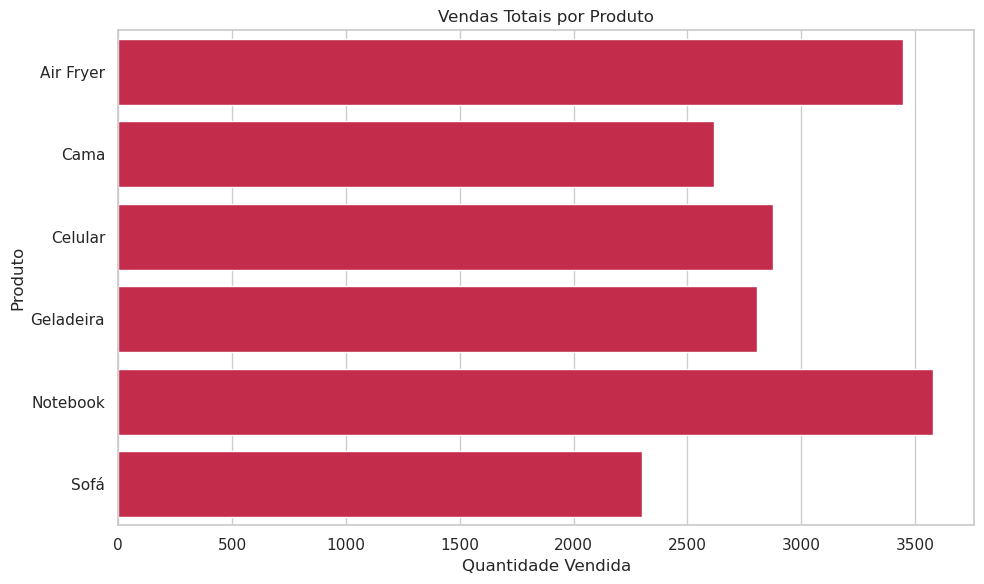

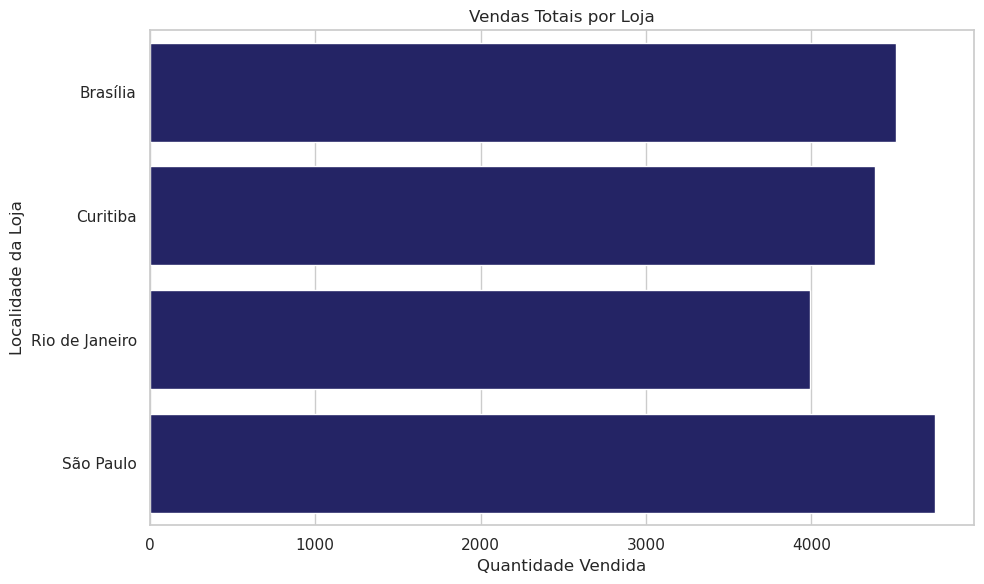

In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

vendas_produto = df.groupby('NomeProduto')['QuantidadeVendida'].sum().reset_index()

vendas_loja = df.groupby('LocalidadeLoja')['QuantidadeVendida'].sum().reset_index()

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.barplot(x='QuantidadeVendida', y='NomeProduto', data=vendas_produto, color='crimson')
plt.title('Vendas Totais por Produto')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Produto')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='QuantidadeVendida', y='LocalidadeLoja', data=vendas_loja, color='midnightblue')
plt.title('Vendas Totais por Loja')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Localidade da Loja')
plt.tight_layout()
plt.show()




##### Crie um gráfico de linha para mostrar a evolução das vendas ao longo do tempo.

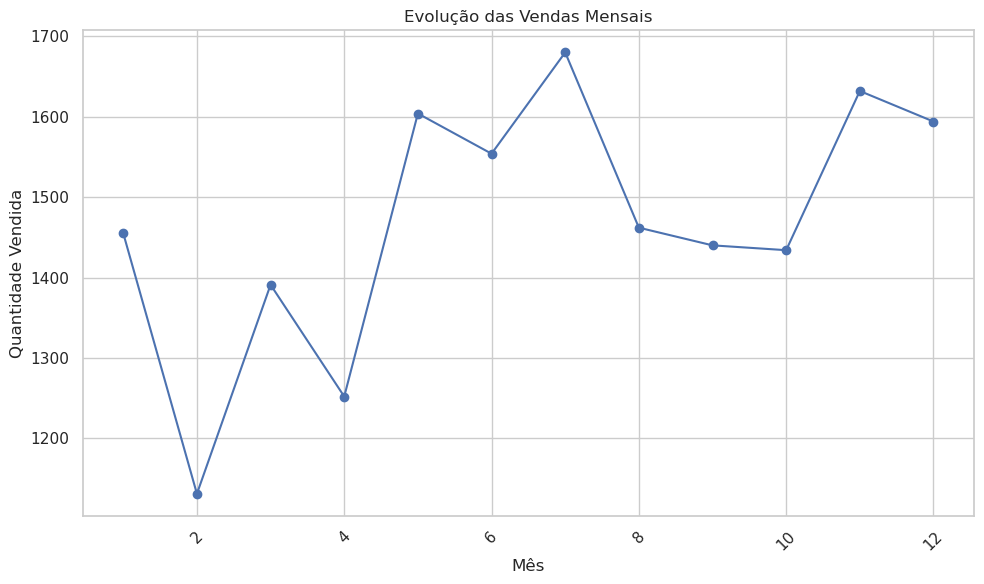

In [200]:
import pandas as pd
import matplotlib.pyplot as plt

vendas_mensais = df.groupby('Mes')['QuantidadeVendida'].sum().reset_index()

vendas_mensais = vendas_mensais.sort_values('Mes')

plt.figure(figsize=(10,6))
plt.plot(vendas_mensais['Mes'], vendas_mensais['QuantidadeVendida'], marker='o', linestyle='-', color='b')

plt.title('Evolução das Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Quantidade Vendida')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()
